<a href="https://www.kaggle.com/code/amirmotefaker/analysis-of-hotel-customer-sentiments?scriptVersionId=129752658" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Analysis of Hotel Customer Sentiments

- Sentiment analysis is part of the Natural Language Processing (NLP) techniques that consists in extracting emotions related to some raw texts. This is usually used on social media posts and customer reviews in order to automatically understand if some users are positive or negative and why. The goal of this study is to show how sentiment analysis can be performed using python. Here are some of the main libraries we will use:

  - NLTK: the most famous python module for NLP techniques
  - Gensim: a topic-modeling and vector space modeling toolkit
  - Scikit-learn: the most used python machine-learning library

- We will use here some hotel review data. Each observation consists of one customer review for one hotel. Each customer review is composed of textual feedback of the customer's experience at the hotel and an overall rating. 

- For each textual review, we want to predict if it corresponds to a good review (the customer is happy) or to a bad one (the customer is not satisfied). The review's overall ratings can range from 2.5/10 to 10/10. 
  - In order to simplify the problem we will split those into two categories:

    - bad reviews have overall ratings < 5
    - good reviews have overall ratings >= 5

- The challenge here is to be able to predict this information using only the raw textual data from the review.

### Why do your guest write reviews?
- Are they autobiographers? Or are they interested in sharing experiences as part of the new “social contract,” as consumers leverage reviews to make booking decisions?

### What types of experiences are they sharing?
- This dependent of the property of course, but reviews could be about many different parts of your hotel, including the amenities, location, room type, service, and others. Are you seeing any themes? Are these themes different than your competitors? If yes, these themes could be powerful advantages or disadvantages that your property has by comparison.

### How does the review help us?
- Ideally, a review is user-generated content that promotes your property. It can also have additional benefits. Perhaps, for example, a review writer highlights an amenity for children that is not advertised, like. a complimentary scoop of ice cream with dinner. A charming experience shared by a reviewer online may go long way for a family planning a trip. While the ice cream would probably not be the primary driver for booking decisions, the review promotes the hotel as a family-friendly environment. The happiness and joy shared by the reviewer could be the tie-breaker between your hotel and a competitor.

### What about your team?
- Perhaps you read a review about team member who delivered exceptional service and you share that comment with the team. How will your team react to that kind of positive motivation? Does this help raise morale and drive performance?

### Do negative reviews hurt us?
- Does a bad review always hurt the property? The answer is, it doesn’t have to. For example, I was recently shopping for online for my oldest child’s first bicycle. One review recounted a story of bicycle that arrived without pedals, which was not discovered until Christmas Eve. The manufacturer responded to the review in a thoughtful and genuine manner, apologizing for the mistake and highlighting the ways the company would avoid making the mistake in the future. Because of that response, I am considering purchasing this bicycle.

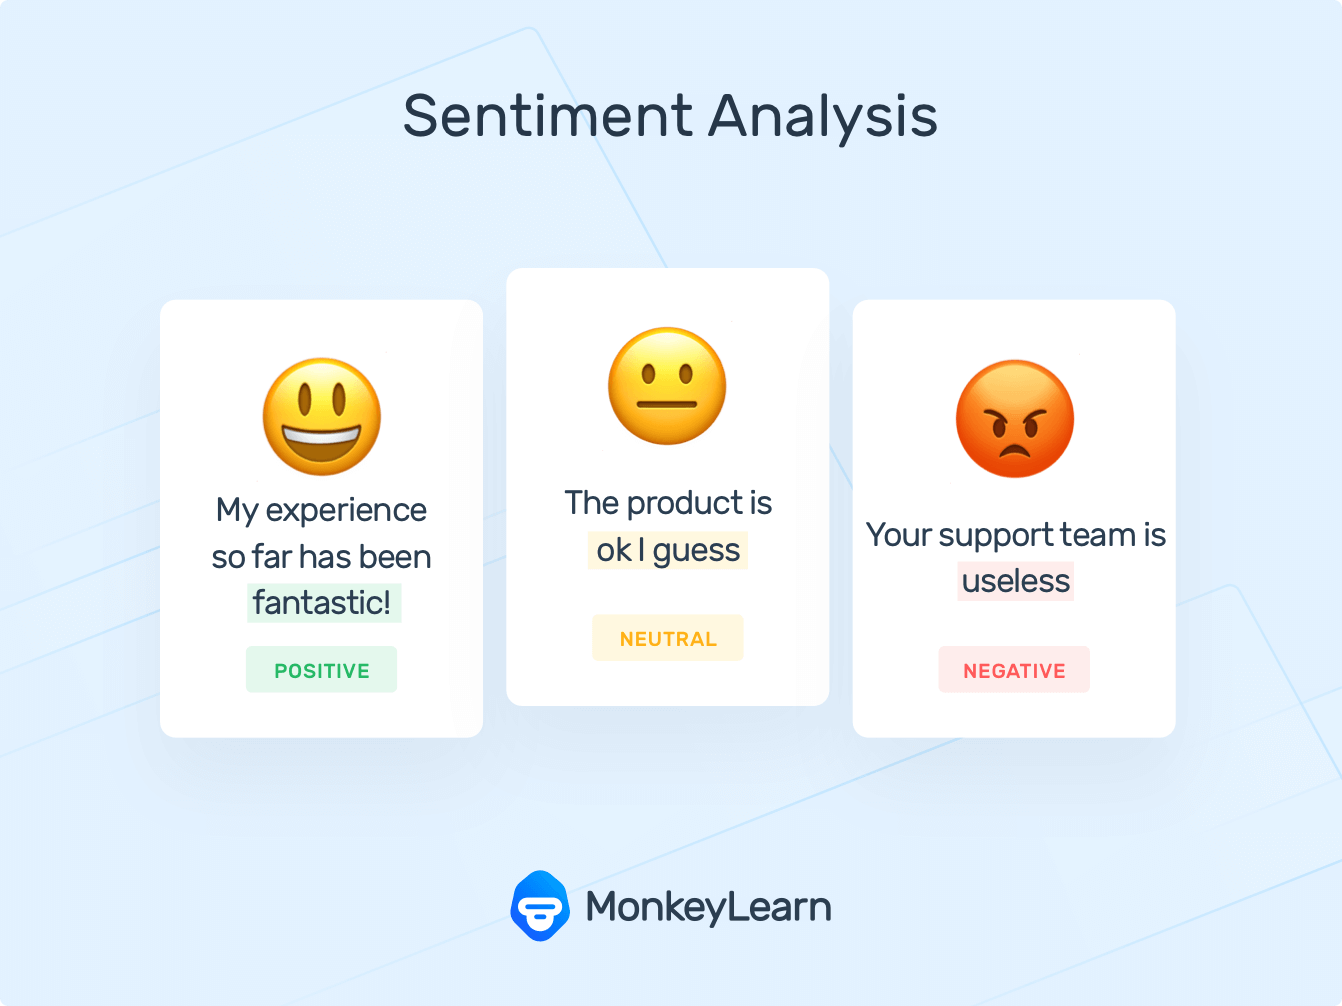

# Import library

In [ ]:
import pandas as pd
import string

from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
#  https://www.nltk.org/data.html

# I added the necessary libraries during coding.

# Read data

In [ ]:
reviews_df = pd.read_csv("/kaggle/input/515k-hotel-reviews-data-in-europe/Hotel_Reviews.csv")

In [ ]:
reviews_df.head()

### Append the positive and negative text reviews

In [ ]:
reviews_df["review"] = reviews_df["Negative_Review"] + reviews_df["Positive_Review"]

### Create the label

In [ ]:
reviews_df["is_bad_review"] = reviews_df["Reviewer_Score"].apply(lambda x: 1 if x < 5 else 0)

### Select only relevant columns

In [ ]:
reviews_df = reviews_df[["review", "is_bad_review"]]
reviews_df.head()

# Sample data
- Reviews data is sampled in order to speed up computations.

In [ ]:
reviews_df = reviews_df.sample(frac = 0.1, replace = False, random_state=42)

# Clean data

### Remove 'No Negative' or 'No Positive' from text
- If the user doesn't leave any negative feedback comment, this will appear as "No Negative" in our data.
- This is the same for the positive comments with the default value "No Positive".
- We have to remove those parts from our texts.

In [ ]:
reviews_df["review"] = reviews_df["review"].apply(lambda x: x.replace("No Negative", "").replace("No Positive", ""))

### NLTK is a leading platform for building Python programs to work with human language data.
- It provides easy-to-use interfaces to over 50 corpora and lexical resources such as:
    - WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries, and an active discussion forum.

### Return the wordnet object value corresponding to the POS tag

In [ ]:
def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

### Clean text

In [ ]:
def clean_text(text):
    # lower text
    text = text.lower()
    
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    
    # remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    
    # pos tag text
    pos_tags = pos_tag(text)
    
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    
    # join all
    text = " ".join(text)
    return(text)

In [ ]:
reviews_df.head()

In [ ]:
# If you’re unsure of which datasets/models you’ll need, you can install the “popular” subset of NLTK data, on the command line type:
#      python -m nltk.downloader popular

import nltk
nltk.download('popular')

### Clean text data

In [ ]:
reviews_df["review_clean"] = reviews_df["review"].apply(lambda x: clean_text(x))

In [ ]:
reviews_df.head()

### To clean textual data, we call our custom 'clean_text' function that performs several transformations:
- Lower the text
- Tokenize the text (split the text into words) and remove the punctuation
- Remove useless words that contain numbers
- Remove useless stop words like 'the', 'a',' this' etc.
- Part-Of-Speech (POS) tagging: assign a tag to every word to define if it corresponds to a noun, a verb, etc. using the WordNet lexical database
- Lemmatize the text: transform every word into its root form (e.g. rooms -> room, slept -> sleep)

# Feature engineering

In [ ]:
# add sentiment anaylsis columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Resource vader_lexicon not found.
# Please use the NLTK Downloader to obtain the resource:
# import nltk
# nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()
reviews_df["sentiments"] = reviews_df["review"].apply(lambda x: sid.polarity_scores(x))
reviews_df = pd.concat([reviews_df.drop(['sentiments'], axis=1), reviews_df['sentiments'].apply(pd.Series)], axis=1)

In [ ]:
reviews_df.head()

- We first start by adding sentiment analysis features because we can guess that customers' reviews are highly linked to how they felt about their stay at the hotel. We use Vader, which is a part of the NLTK module designed for sentiment analysis. Vader uses a lexicon of words to find which ones are positives or negatives. It also takes into account the context of the sentences to determine the sentiment scores.

- For each text, Vader returns 4 values:

    - a neutrality score
    - a positivity score
    - a negativity score
    - an overall score that summarizes the previous scores

- We will integrate those 4 values as features in our dataset.

In [ ]:
# add number of characters column
reviews_df["nb_chars"] = reviews_df["review"].apply(lambda x: len(x))

# add number of words column
reviews_df["nb_words"] = reviews_df["review"].apply(lambda x: len(x.split(" ")))

In [ ]:
reviews_df.head()

- Next, we add some simple metrics for every text:
    - number of characters in the text
    - number of words in the text

In [ ]:
# create doc2vec vector columns
# gensim is a Python framework for fast Vector Space Modelling
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(reviews_df["review_clean"].apply(lambda x: x.split(" ")))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = reviews_df["review_clean"].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
reviews_df = pd.concat([reviews_df, doc2vec_df], axis=1)

In [ ]:
reviews_df.head()

- The next step consists in extracting vector representations for every review.

- The module Gensim creates a numerical vector representation of every word in the corpus by using the contexts in which they appear (Word2Vec). This is performed using shallow neural networks. What's interesting is that similar words will have similar representation vectors.

- Each text can also be transformed into numerical vectors using the word vectors (Doc2Vec). Same texts will also have similar representations and that is why we can use those vectors as training features.

- We first have to train a Doc2Vec model by feeding in our text data. By applying this model to our reviews, we can get those representation vectors.

### TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

In [ ]:
# add tf-idfs columns
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(min_df = 10)
tfidf_result = tfidf.fit_transform(reviews_df["review_clean"]).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns = tfidf.get_feature_names_out())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = reviews_df.index
reviews_df = pd.concat([reviews_df, tfidf_df], axis=1)

- Finally, we add the TF-IDF (Term Frequency - Inverse Document Frequency) values for every word and every document.

- But why not simply count how many times each word appears in every document? The problem with this method is that it doesn't take into account the relative importance of words in the texts. A word that appears in almost every text would not likely bring useful information for analysis. On the contrary, rare words may have a lot more meanings.

- The TF-IDF metric solves this problem:
    - TF computes the classic number of times the word appears in the text
    - IDF computes the relative importance of this word which depends on how many texts the word can be found


- We add TF-IDF columns for every word that appears in at least 10 different texts to filter some of them and reduce the size of the final output.

In [ ]:
reviews_df.head()

In [ ]:
reviews_df.shape

# Exploratory data analysis
### In order to have a better understanding of our data, let's explore it a little:

In [ ]:
# show is_bad_review distribution
reviews_df["is_bad_review"].value_counts(normalize = True)

- Our dataset is highly imbalanced because less than 5% of our reviews are considered negative ones. This information will be very useful for the modeling part.

### Now let's print some word clouds to have a glimpse at what kind of words appear in our reviews:

In [ ]:
# wordcloud function

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(reviews_df["review"])

- Most of the words are indeed related to the hotels: room, staff, breakfast, etc.
- Some words are more related to the customer experience with the hotel stay: perfect, loved, expensive, dislike, etc.

### Highest positive sentiment reviews (with more than 5 words)

In [ ]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("pos", ascending = False)[["review", "pos"]].head(10)

- The most positive reviews indeed correspond to some good feedbacks.

### Lowest negative sentiment reviews (with more than 5 words)

In [ ]:
reviews_df[reviews_df["nb_words"] >= 5].sort_values("neg", ascending = False)[["review", "neg"]].head(10)

- Some errors can be found among the most negative reviews: Vader sometimes interprets 'no' or 'nothing' as negative words whereas they are sometimes used to say that there were no problems with the hotel.
- Fortunately, most of the reviews are indeed bad ones.

### Plot sentiment distribution for positive and negative reviews

In [ ]:
import seaborn as sns

for x in [0, 1]:
    subset = reviews_df[reviews_df['is_bad_review'] == x]
    
    # Draw the density plot
    if x == 0:
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)
    #sns.displot(subset['compound'], label = label, kind="kde")
    #sns.histplot(subset['compound'], label = label, kde=True)


- The above graph shows the distribution of the reviews sentiments among good reviews and bad ones. We can see that good reviews are for most of them considered very positive by Vader. On the contrary, bad reviews tend to have lower compound sentiment scores.

- This shows us that previously computed sentiment features will be very important in our modeling part.

# Modeling Reviewer Score

In [ ]:
# feature selection
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

# split the data into train and test
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(reviews_df[features], reviews_df[label], test_size = 0.20, random_state = 42)

- We first choose which features we want to use to train our model. Then we split our data into two parts:

    - one to train our model
    - one to assess its performances
    

- We will next use a Random Forest (RF) classifier for our predictions.

In [ ]:
# train a random forest classifier
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(X_train, y_train)

# show feature importance
feature_importances_df = pd.DataFrame({"feature": features, "importance": rf.feature_importances_}).sort_values("importance", ascending = False)
feature_importances_df.head(20)

- The most important features are indeed the ones that come from the previous sentiment analysis.
- The vector representations of the texts also have a lot of importance in our training.
- Some words appear to have fairly good importance as well.

# ROC curve

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt

y_pred = [x[1] for x in rf.predict_proba(X_test)]
fpr, tpr, thresholds = roc_curve(y_test, y_pred, pos_label = 1)

roc_auc = auc(fpr, tpr)

plt.figure(1, figsize = (15, 10))
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

- The ROC (Receiver Operating Characteristic) curve is usually a good graph to summarize the quality of our classifier. The higher the curve is above the diagonal baseline, the better the predictions. Although the AUC ROC (Area Under the Curve ROC) is very good, we should not use here the ROC curve to assess the quality of our model.

- Why? First let us remind the False Positive Rate formula, which corresponds to the x-axis of the ROC curve: FPR (False Positive Rate) = # False Positives / # Negatives.

- Here the # Negatives corresponds to our number of good reviews which is very high because our dataset is imbalanced. This means that even with some False Positives, our FPR will tend to stay very low. Our model will be able to make a lot of false positive predictions and still have a low false positive rate while increasing the true positive rate and therefore artificially increasing the AUC ROC metric.

# PR(Precision-Recall) curve

In [ ]:
from sklearn.metrics import average_precision_score, precision_recall_curve
#from sklearn.utils.fixes import signature
!pip install funcsigs
from funcsigs import signature

average_precision = average_precision_score(y_test, y_pred)

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})

plt.figure(1, figsize = (15, 10))
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))

- A better metric in this imbalanced situation is the AUC PR (Area Under the Curve Precision Recall), also called AP (Average Precision).

- We can see that the precision decreases when we increase the recall. This shows us that we have to choose a prediction threshold adapted to our needs. If our goal is to have a high recall, we should set a low prediction threshold that will allow us to detect most of the observations of the positive class, but with low precision. On the contrary, if we want to be really confident about our predictions but don't mind about not finding all the positive observations, we should set a high threshold that will get us a high precision and a low recall.

- In order to know if our model performs better than another classifier, we can simply use the AP metric. To assess the quality of our model, we can compare it to a simple decision baseline. Let's take a random classifier as a baseline here that would predict half of the time 1 and half of the time 0 for the label.

- Such a classifier would have a precision of 4.3%, which corresponds to the proportion of positive observations. For every recall value, the precision would stay the same, and this would lead us to an AP of 0.043. The AP of our model is approximately 0.38, which is more than 8 times higher than the AP of the random method. This means that our model has good predictive power.

# Conclusion
- It is completely possible to use only raw text as input for making predictions. The most important thing is to be able to extract the relevant features from this raw source of data. This kind of data can often come as a good complementary source in data science projects in order to extract more learning features and increase the predictive power of the models.